<a href="https://colab.research.google.com/github/msrahulvarma/RahulVarma_INFO5731_Fall2023/blob/main/Muppalla_exercise_05_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fifth in-class-exercise (40 points in total, 4/18/2023)**

(20 points) The purpose of the question is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training.

The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.

Algorithms:

(1) MultinominalNB

(2) SVM

(3) KNN

(4) Decision tree

(5) Random Forest

(6) XGBoost

(7) Word2Vec

(8) BERT

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison

(4) F-1 score

In [ ]:
import warnings

# Disregarding specific types of warnings
warnings.filterwarnings("ignore", category=ImportWarning, module="find_module()")
warnings.filterwarnings("ignore", category=FutureWarning)

# Alternatively, to disregard all warnings (be cautious with this approach)
warnings.filterwarnings("ignore")


In [ ]:
import warnings

# Filter out specific warnings
warnings.filterwarnings("ignore", category=ImportWarning, module="find_spec()")
warnings.filterwarnings("ignore", category=FutureWarning)

# Or suppress all warnings (use with caution)
warnings.filterwarnings("ignore")


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.pipeline import make_pipeline

In [ ]:
# Function to read and format the dataset
def read_and_format_dataset(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        data = []
        for line in file:
            label, review = line.strip().split(' ', 1)
            data.append({'label': int(label), 'review': review})
        return pd.DataFrame(data)


In [ ]:
# Reading and formatting the training and test datasets
train_file_path = 'stsa-train.txt'
test_file_path = 'stsa-test.txt'
train_df = read_and_format_dataset(train_file_path)
test_df = read_and_format_dataset(test_file_path)

# Checking the first few rows of the dataframes after correction
print("Training Data - First Few Rows:")
print(train_df.head())

print("\nTest Data - First Few Rows:")
print(test_df.head())

Training Data - First Few Rows:
   label                                             review
0      1  a stirring , funny and finally transporting re...
1      0  apparently reassembled from the cutting-room f...
2      0  they presume their audience wo n't sit still f...
3      1  this is a visually stunning rumination on love...
4      1  jonathan parker 's bartleby should have been t...

Test Data - First Few Rows:
   label                                             review
0      0     no movement , no yuks , not much of anything .
1      0  a gob of drivel so sickly sweet , even the eag...
2      0  gangs of new york is an unapologetic mess , wh...
3      0  we never really feel involved with the story ,...
4      1            this is one of polanski 's best films .


In [ ]:
# Splitting the training data into training and validation sets
train_X, valid_X, train_y, valid_y = train_test_split(train_df['review'], train_df['label'], test_size=0.2, random_state=42)

print("Training Set Size:", len(train_X))
print("Validation Set Size:", len(valid_X))

Training Set Size: 5536
Validation Set Size: 1384


In [ ]:
# Creating a pipeline with CountVectorizer and MultinomialNB
model = make_pipeline(CountVectorizer(), MultinomialNB())

# Conducting 10-fold cross-validation
cross_val_scores = cross_val_score(model, train_X, train_y, cv=10)

# Training the model on the entire training dataset
model.fit(train_X, train_y)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [ ]:
# Evaluating the model on the validation set
valid_pred = model.predict(valid_X)
accuracy = accuracy_score(valid_y, valid_pred)
recall = recall_score(valid_y, valid_pred)
precision = precision_score(valid_y, valid_pred)
f1 = f1_score(valid_y, valid_pred)
f1

0.8088829071332435

In [ ]:
# Evaluating the model on the test dataset
test_pred = model.predict(test_df['review'])
test_accuracy = accuracy_score(test_df['label'], test_pred)
test_recall = recall_score(test_df['label'], test_pred)
test_precision = precision_score(test_df['label'], test_pred)
test_f1 = f1_score(test_df['label'], test_pred)
test_f1

0.8139904610492847

In [ ]:
# Evaluating the model on the test dataset
test_pred = model.predict(test_df['review'])
test_accuracy = accuracy_score(test_df['label'], test_pred)
test_recall = recall_score(test_df['label'], test_pred)
test_precision = precision_score(test_df['label'], test_pred)
test_f1 = f1_score(test_df['label'], test_pred)

In [ ]:
# Displaying the results
print("Cross-Validation Score:", cross_val_scores.mean())
print("Validation Set - Accuracy:", accuracy, "Recall:", recall, "Precision:", precision, "F1 Score:", f1)
print("Test Set - Accuracy:", test_accuracy, "Recall:", test_recall, "Precision:", test_precision, "F1 Score:", test_f1)


Cross-Validation Score: 0.7790809565154947
Validation Set - Accuracy: 0.7947976878612717 Recall: 0.8429172510518934 Precision: 0.777490297542044 F1 Score: 0.8088829071332435
Test Set - Accuracy: 0.8072487644151565 Recall: 0.8448844884488449 Precision: 0.7852760736196319 F1 Score: 0.8139904610492847


In [ ]:
#2 SVM
from sklearn.svm import SVC
# Splitting the training data into training and validation sets
train_X, valid_X, train_y, valid_y = train_test_split(train_df['review'], train_df['label'], test_size=0.2, random_state=42)

# Preprocessing the text data using CountVectorizer
vectorizer = CountVectorizer()
train_X = vectorizer.fit_transform(train_X)
valid_X = vectorizer.transform(valid_X)

# Training the SVM model
svm_model = SVC()
svm_model.fit(train_X, train_y)

SVC()

In [ ]:
# Evaluate on the validation set
valid_pred = svm_model.predict(valid_X)
valid_accuracy = accuracy_score(valid_y, valid_pred)
valid_recall = recall_score(valid_y, valid_pred)
valid_precision = precision_score(valid_y, valid_pred)
valid_f1 = f1_score(valid_y, valid_pred)

print("Validation Set - Accuracy:", valid_accuracy)
print("Validation Set - Recall:", valid_recall)
print("Validation Set - Precision:", valid_precision)
print("Validation Set - F1 Score:", valid_f1)



Validation Set - Accuracy: 0.7557803468208093
Validation Set - Recall: 0.8120617110799438
Validation Set - Precision: 0.7394636015325671
Validation Set - F1 Score: 0.7740641711229947


In [ ]:


# Preprocess the test data and evaluate on the test set
test_X = vectorizer.transform(test_df['review'])
test_pred = svm_model.predict(test_X)
test_accuracy = accuracy_score(test_df['label'], test_pred)
test_recall = recall_score(test_df['label'], test_pred)
test_precision = precision_score(test_df['label'], test_pred)
test_f1 = f1_score(test_df['label'], test_pred)

print("\nTest Set - Accuracy:", test_accuracy)
print("Test Set - Recall:", test_recall)
print("Test Set - Precision:", test_precision)
print("Test Set - F1 Score:", test_f1)


Test Set - Accuracy: 0.757276221856123
Test Set - Recall: 0.8041804180418042
Test Set - Precision: 0.7346733668341708
Test Set - F1 Score: 0.7678571428571429


In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
# Splitting the training data into training and validation sets
train_X, valid_X, train_y, valid_y = train_test_split(train_df['review'], train_df['label'], test_size=0.2, random_state=42)

# Preprocessing the text data using CountVectorizer
vectorizer = CountVectorizer()
train_X = vectorizer.fit_transform(train_X)
valid_X = vectorizer.transform(valid_X)

# Training the KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(train_X, train_y)
# Evaluate on the validation set
valid_pred = knn_model.predict(valid_X)
valid_accuracy = accuracy_score(valid_y, valid_pred)
valid_recall = recall_score(valid_y, valid_pred)
valid_precision = precision_score(valid_y, valid_pred)
valid_f1 = f1_score(valid_y, valid_pred)

print("Validation Set - Accuracy:", valid_accuracy)
print("Validation Set - Recall:", valid_recall)
print("Validation Set - Precision:", valid_precision)
print("Validation Set - F1 Score:", valid_f1)


Validation Set - Accuracy: 0.6163294797687862
Validation Set - Recall: 0.6479663394109397
Validation Set - Precision: 0.6226415094339622
Validation Set - F1 Score: 0.6350515463917525


In [ ]:
# Preprocess the test data and evaluate on the test set
test_X = vectorizer.transform(test_df['review'])
test_pred = knn_model.predict(test_X)
test_accuracy = accuracy_score(test_df['label'], test_pred)
test_recall = recall_score(test_df['label'], test_pred)
test_precision = precision_score(test_df['label'], test_pred)
test_f1 = f1_score(test_df['label'], test_pred)

print("\nTest Set - Accuracy:", test_accuracy)
print("Test Set - Recall:", test_recall)
print("Test Set - Precision:", test_precision)
print("Test Set - F1 Score:", test_f1)


Test Set - Accuracy: 0.5831960461285008
Test Set - Recall: 0.6160616061606161
Test Set - Precision: 0.5773195876288659
Test Set - F1 Score: 0.5960617349654072


In [ ]:
# 4) Decision Tree
from sklearn.tree import DecisionTreeClassifier
# Splitting the training data into training and validation sets
train_X, valid_X, train_y, valid_y = train_test_split(train_df['review'], train_df['label'], test_size=0.2, random_state=42)

# Preprocessing the text data using CountVectorizer
vectorizer = CountVectorizer()
train_X = vectorizer.fit_transform(train_X)
valid_X = vectorizer.transform(valid_X)

# Creating and training the Decision Tree classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(train_X, train_y)
# Perform 10-fold cross-validation
cross_val_scores = cross_val_score(decision_tree_model, train_X, train_y, cv=10)
average_cross_val_score = cross_val_scores.mean()

print("Average Cross-Validation Score:", average_cross_val_score)

Average Cross-Validation Score: 0.6309535777935906


In [ ]:
# Evaluate on the validation set
valid_pred = decision_tree_model.predict(valid_X)
valid_accuracy = accuracy_score(valid_y, valid_pred)
valid_recall = recall_score(valid_y, valid_pred)
valid_precision = precision_score(valid_y, valid_pred)
valid_f1 = f1_score(valid_y, valid_pred)

print("Validation Set - Accuracy:", valid_accuracy)
print("Validation Set - Recall:", valid_recall)
print("Validation Set - Precision:", valid_precision)
print("Validation Set - F1 Score:", valid_f1)

Validation Set - Accuracy: 0.6416184971098265
Validation Set - Recall: 0.6774193548387096
Validation Set - Precision: 0.6448598130841121
Validation Set - F1 Score: 0.6607387140902872


In [ ]:
# Preprocess the test data and evaluate on the test set
test_X = vectorizer.transform(test_df['review'])
test_pred = decision_tree_model.predict(test_X)
test_accuracy = accuracy_score(test_df['label'], test_pred)
test_recall = recall_score(test_df['label'], test_pred)
test_precision = precision_score(test_df['label'], test_pred)
test_f1 = f1_score(test_df['label'], test_pred)

print("\nTest Set - Accuracy:", test_accuracy)
print("Test Set - Recall:", test_recall)
print("Test Set - Precision:", test_precision)
print("Test Set - F1 Score:", test_f1)


Test Set - Accuracy: 0.6436024162548051
Test Set - Recall: 0.6754675467546755
Test Set - Precision: 0.6342975206611571
Test Set - F1 Score: 0.6542354821523708


In [ ]:
# random forest
from sklearn.ensemble import RandomForestClassifier
# Creating and training the Random Forest classifier
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(train_X, train_y)
# Perform 10-fold cross-validation
cross_val_scores = cross_val_score(random_forest_model, train_X, train_y, cv=10)
average_cross_val_score = cross_val_scores.mean()

print("Average Cross-Validation Score:", average_cross_val_score)

Average Cross-Validation Score: 0.7173157898172751


In [ ]:
# Evaluate on the validation set
valid_pred = random_forest_model.predict(valid_X)
valid_accuracy = accuracy_score(valid_y, valid_pred)
valid_recall = recall_score(valid_y, valid_pred)
valid_precision = precision_score(valid_y, valid_pred)
valid_f1 = f1_score(valid_y, valid_pred)

print("Validation Set - Accuracy:", valid_accuracy)
print("Validation Set - Recall:", valid_recall)
print("Validation Set - Precision:", valid_precision)
print("Validation Set - F1 Score:", valid_f1)

Validation Set - Accuracy: 0.7333815028901735
Validation Set - Recall: 0.7994389901823282
Validation Set - Precision: 0.7160804020100503
Validation Set - F1 Score: 0.7554671968190856


In [ ]:
# Preprocess the test data and evaluate on the test set
test_X = vectorizer.transform(test_df['review'])
test_pred = random_forest_model.predict(test_X)
test_accuracy = accuracy_score(test_df['label'], test_pred)
test_recall = recall_score(test_df['label'], test_pred)
test_precision = precision_score(test_df['label'], test_pred)
test_f1 = f1_score(test_df['label'], test_pred)

print("\nTest Set - Accuracy:", test_accuracy)
print("Test Set - Recall:", test_recall)
print("Test Set - Precision:", test_precision)
print("Test Set - F1 Score:", test_f1)


Test Set - Accuracy: 0.7325645249862712
Test Set - Recall: 0.7887788778877888
Test Set - Precision: 0.708498023715415
Test Set - F1 Score: 0.7464862051015096


In [ ]:
# xgboost
import xgboost as xgb
# Creating and training the XGBoost classifier
xgboost_model = xgb.XGBClassifier(random_state=42)
xgboost_model.fit(train_X, train_y)
# Perform 10-fold cross-validation
cross_val_scores = cross_val_score(xgboost_model, train_X, train_y, cv=10)
average_cross_val_score = cross_val_scores.mean()

print("Average Cross-Validation Score:", average_cross_val_score)

Average Cross-Validation Score: 0.710087086518563


In [ ]:
# Evaluate on the validation set
valid_pred = xgboost_model.predict(valid_X)
valid_accuracy = accuracy_score(valid_y, valid_pred)
valid_recall = recall_score(valid_y, valid_pred)
valid_precision = precision_score(valid_y, valid_pred)
valid_f1 = f1_score(valid_y, valid_pred)

print("Validation Set - Accuracy:", valid_accuracy)
print("Validation Set - Recall:", valid_recall)
print("Validation Set - Precision:", valid_precision)
print("Validation Set - F1 Score:", valid_f1)

Validation Set - Accuracy: 0.7398843930635838
Validation Set - Recall: 0.8288920056100981
Validation Set - Precision: 0.7129071170084439
Validation Set - F1 Score: 0.7665369649805446


In [ ]:
# Preprocess the test data and evaluate on the test set
test_X = vectorizer.transform(test_df['review'])
test_pred = xgboost_model.predict(test_X)
test_accuracy = accuracy_score(test_df['label'], test_pred)
test_recall = recall_score(test_df['label'], test_pred)
test_precision = precision_score(test_df['label'], test_pred)
test_f1 = f1_score(test_df['label'], test_pred)

print("\nTest Set - Accuracy:", test_accuracy)
print("Test Set - Recall:", test_recall)
print("Test Set - Precision:", test_precision)
print("Test Set - F1 Score:", test_f1)


Test Set - Accuracy: 0.727622185612301
Test Set - Recall: 0.812981298129813
Test Set - Precision: 0.6938967136150235
Test Set - F1 Score: 0.7487335359675785


(20 points) The purpose of the question is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K-means

DBSCAN

Hierarchical clustering

Word2Vec

BERT

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/Amazon_Unlocked_Mobile.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


k-means

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np

# For clustering, we can use the 'Reviews' column. Let's first vectorize the text data.
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['Reviews'].dropna())

# Let's apply K-means clustering
# Number of clusters can be arbitrarily chosen, here we choose 5 for demonstration
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X)

# Getting the cluster labels for each review
cluster_labels = kmeans.labels_

# Add the cluster labels to the dataframe
data['KMeans_Cluster'] = np.nan
data.loc[data['Reviews'].notna(), 'KMeans_Cluster'] = cluster_labels

# Display the first few rows with the cluster labels
data.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,KMeans_Cluster
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,0.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,1.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,0.0


DBSCAN

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN

# Load the dataset
file_path = '/content/Amazon_Unlocked_Mobile.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Vectorizing the reviews using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['Reviews'].dropna())

# Selecting a random sample from the dataset
sample_size = 1000  # Adjust the sample size based on your needs and resources
sampled_data = data.sample(n=sample_size, random_state=0)

# Vectorizing the sampled reviews
sampled_X = vectorizer.transform(sampled_data['Reviews'].dropna())

# Apply DBSCAN to the sampled data
dbscan_sampled = DBSCAN(eps=0.5, min_samples=5)
dbscan_sampled.fit(sampled_X)

# Get the cluster labels for the sampled data
dbscan_sampled_labels = dbscan_sampled.labels_

# Add the DBSCAN cluster labels to the sampled dataframe
sampled_data['DBSCAN_Cluster_Sampled'] = dbscan_sampled_labels

# Display the first few rows with the DBSCAN cluster labels
print(sampled_data.head())


                                             Product Name Brand Name    Price  \
134801  BLU Studio 5.0 C HD - Unlocked Cell Phones - R...        BLU  2000.00   
123493                         Blu LIFE 8 Unlocked (Pink)        BLU   199.98   
335592  Samsung Galaxy S Duos II S7582 DUAL SIM Factor...    Samsung   299.99   
246353  Motorola Droid 2 A955 Verizon Phone 5MP Cam, W...   Motorola    82.00   
347432  Samsung Galaxy S4 White i9500 16GB Factory Unl...        NaN   293.99   

        Rating                                            Reviews  \
134801       5  For the price I paid for this devices, its fan...   
123493       5  love love love it....good buy...recommend to a...   
335592       4                                               Good   
246353       1  Not good. Returned first phone and they sent m...   
347432       2  I have purchased this product about 3 months a...   

        Review Votes  DBSCAN_Cluster_Sampled  
134801           0.0                      -1  
1234

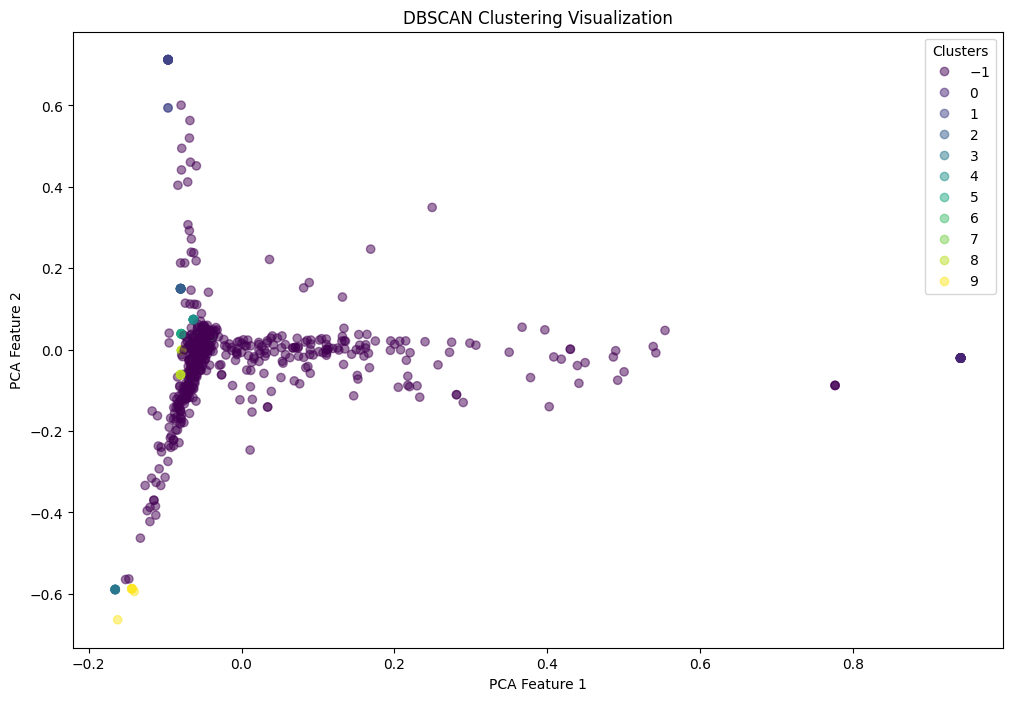

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Applying PCA to reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
sampled_X_reduced = pca.fit_transform(sampled_X.toarray())

# Extracting the PCA reduced coordinates
x_coords = sampled_X_reduced[:, 0]
y_coords = sampled_X_reduced[:, 1]

# Plotting the DBSCAN clustering results
plt.figure(figsize=(12, 8))
scatter = plt.scatter(x_coords, y_coords, c=dbscan_sampled_labels, cmap='viridis', alpha=0.5)
plt.title('DBSCAN Clustering Visualization')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')

# Adding a legend for the clusters
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

Hierarchical clustering

In [ ]:
#Hierarchical clustering
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import AgglomerativeClustering

# Load the dataset
file_path = '/content/Amazon_Unlocked_Mobile.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Vectorizing the reviews using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['Reviews'].dropna())

# Selecting a smaller subset of the data for clustering
sample_size = 500  # Adjust as needed
sampled_data = data.sample(n=sample_size, random_state=0)
sampled_X = vectorizer.transform(sampled_data['Reviews'].dropna())

# Reducing the dimensionality of the subset with Truncated SVD
svd = TruncatedSVD(n_components=50, random_state=0)
sampled_X_reduced = svd.fit_transform(sampled_X)

# Applying Agglomerative Clustering to the reduced data
agg_clustering = AgglomerativeClustering(n_clusters=5)
agg_cluster_labels = agg_clustering.fit_predict(sampled_X_reduced)

# Attaching the cluster labels to the subset
sampled_data['Agglomerative_Cluster'] = agg_cluster_labels

# Display the first few rows with the cluster labels
print(sampled_data.head())


                                             Product Name Brand Name    Price  \
134801  BLU Studio 5.0 C HD - Unlocked Cell Phones - R...        BLU  2000.00   
123493                         Blu LIFE 8 Unlocked (Pink)        BLU   199.98   
335592  Samsung Galaxy S Duos II S7582 DUAL SIM Factor...    Samsung   299.99   
246353  Motorola Droid 2 A955 Verizon Phone 5MP Cam, W...   Motorola    82.00   
347432  Samsung Galaxy S4 White i9500 16GB Factory Unl...        NaN   293.99   

        Rating                                            Reviews  \
134801       5  For the price I paid for this devices, its fan...   
123493       5  love love love it....good buy...recommend to a...   
335592       4                                               Good   
246353       1  Not good. Returned first phone and they sent m...   
347432       2  I have purchased this product about 3 months a...   

        Review Votes  Agglomerative_Cluster  
134801           0.0                      0  
123493

Word2Vec

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


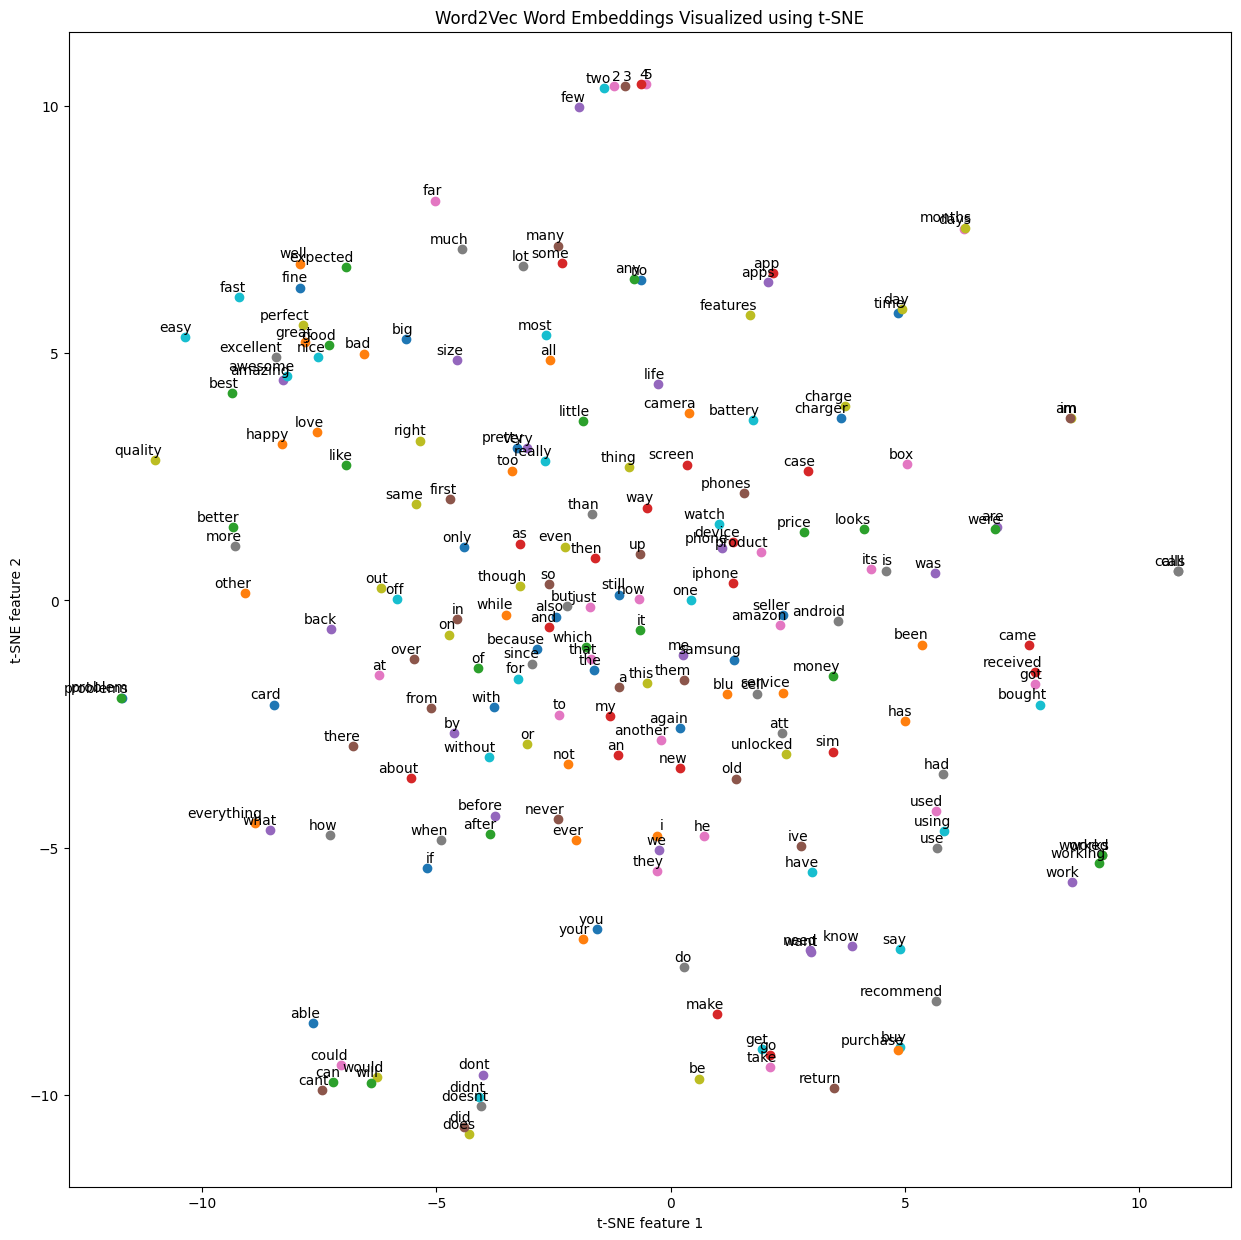

In [ ]:
import pandas as pd
import numpy as np
import string
import nltk
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Ensure you have the 'punkt' tokenizer downloaded
nltk.download('punkt')

# Load the dataset
file_path = '/content/Amazon_Unlocked_Mobile.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Preprocessing text data
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize the text into words
    words = word_tokenize(text)
    return words

# Apply preprocessing to each review
processed_reviews = data['Reviews'].dropna().apply(preprocess_text)

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=processed_reviews, vector_size=100, window=5, min_count=1, workers=4)

# Retrieve the word vectors from the trained Word2Vec model
word_vectors = word2vec_model.wv

# Select a subset of words to visualize (for example, the first 200 words)
selected_words = list(word_vectors.index_to_key)[:200]
selected_vectors = [word_vectors[word] for word in selected_words]

# Convert the list of vectors to a NumPy array
selected_vectors_array = np.array(selected_vectors)

# Apply t-SNE to reduce dimensions
tsne = TSNE(n_components=2, random_state=0)
vectors_2d = tsne.fit_transform(selected_vectors_array)

# Plotting the 2D vectors with labels
plt.figure(figsize=(15, 15))
for i, word in enumerate(selected_words):
    plt.scatter(vectors_2d[i, 0], vectors_2d[i, 1])
    plt.annotate(word, xy=(vectors_2d[i, 0], vectors_2d[i, 1]), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')

plt.title('Word2Vec Word Embeddings Visualized using t-SNE')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()


BERT

In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.

In [ ]:
#You can write you answer here. (No code needed)
#K-means, DBSCAN, and Hierarchical clustering are different ways to group data. K-means splits data into a set number of groups, but it sometimes struggles if the groups are oddly shaped or different sizes. DBSCAN is good at finding groups of different shapes and can ignore random, scattered points, but it can be tricky to set up correctly and may not work well if groups are very different in density. Hierarchical clustering creates a tree-like structure of groups, showing how they are connected, but it can be slow with a lot of data and might get confused by outliers or noise. Word2Vec and BERT, however, are not about grouping data. They turn words or sentences into numbers that a computer can understand. Word2Vec does this in a simpler way and is good at finding related words. BERT is more complex and better at understanding the full meaning of sentences. So, while K-means, DBSCAN, and Hierarchical clustering are about grouping things together, Word2Vec and BERT help in understanding and representing language in a form that computers can use, which can then be applied to different tasks like grouping.